#Import Libreries

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Data Acquisition

In [2]:
# Load the dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

# Download and unzip the dataset
!wget $url -O student.zip
!unzip -o student.zip

# Load the data into a DataFrame
student_data = pd.read_csv("student-mat.csv", sep=";")

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(student_data.head())


--2024-04-22 13:00:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘student.zip’

student.zip             [ <=>                ]  20.00K  --.-KB/s    in 0.06s   

2024-04-22 13:00:14 (328 KB/s) - ‘student.zip’ saved [20478]

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             
First few rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  

#Data Cleaning

In [3]:
# Check for missing values
missing_values = student_data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


#Explorative Data Analysis

In [4]:
# Summary statistics
print("\nSummary statistics:")
print(student_data.describe())



Summary statistics:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std   

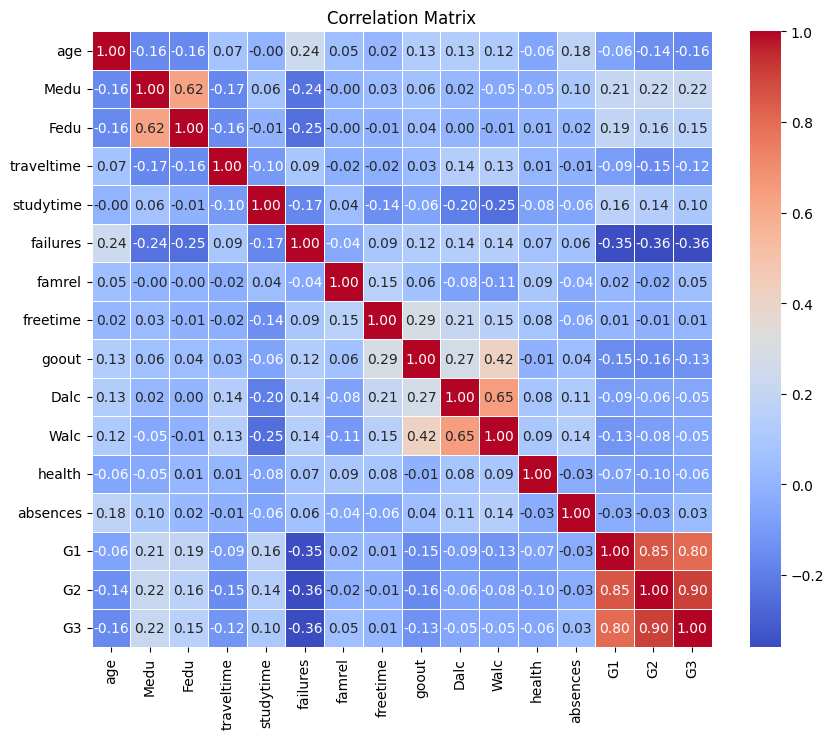

In [5]:
# Correlation analysis only with numeric columns
numeric_columns = student_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = student_data[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [6]:
student_data_encoded = pd.get_dummies(student_data)

In [7]:
student_data_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


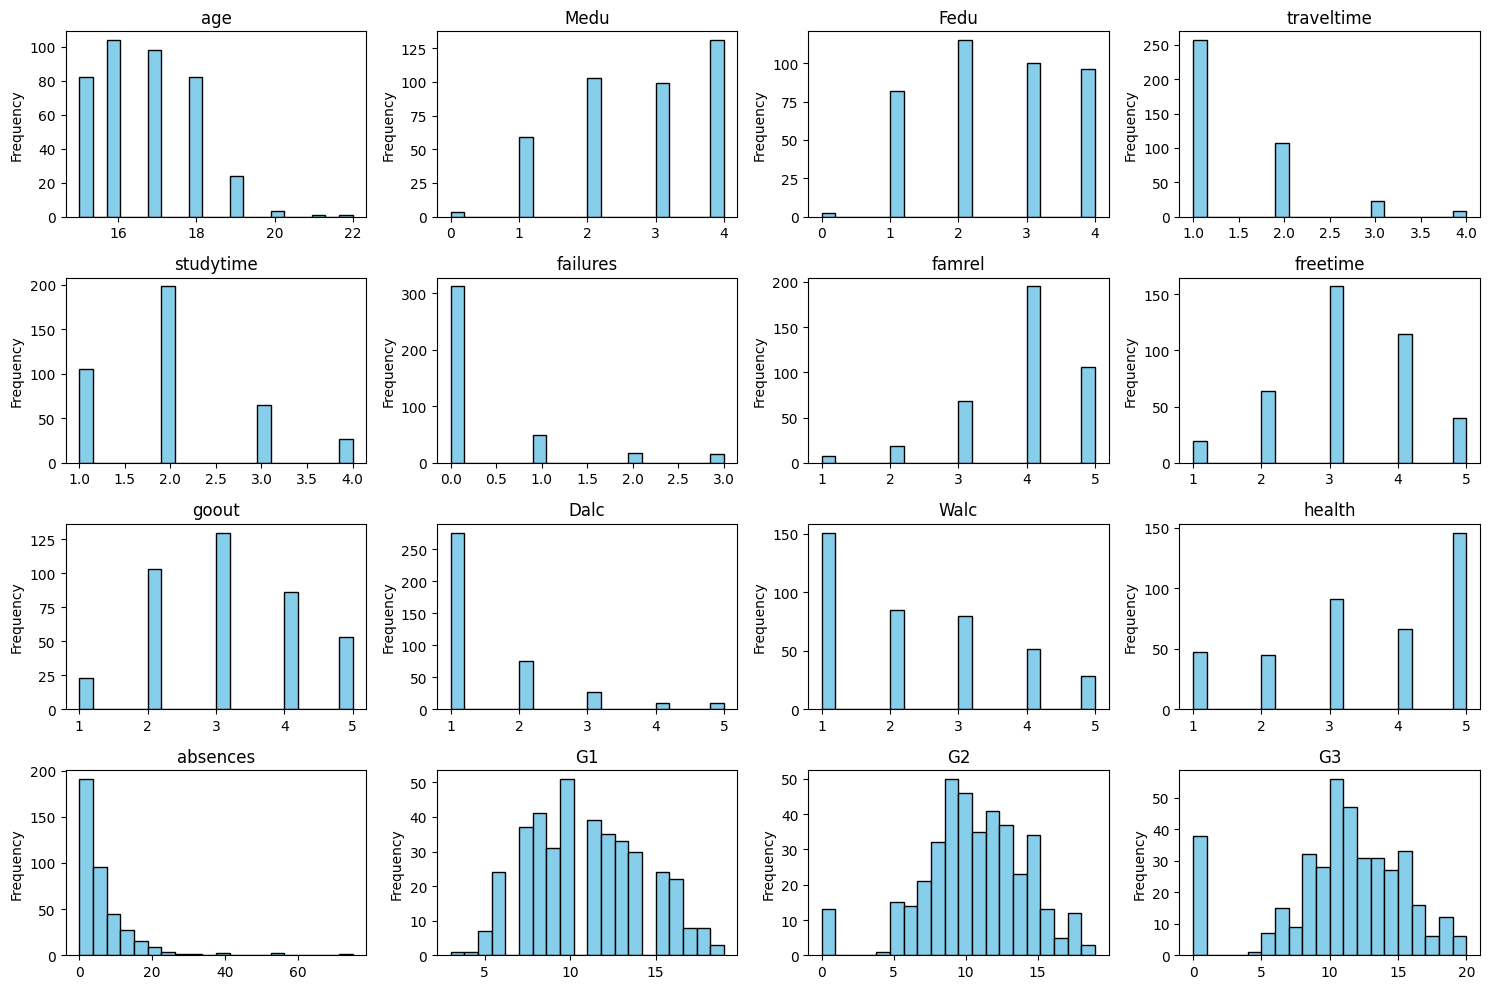

In [8]:
# Plot histograms for numerical variables
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    student_data[col].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


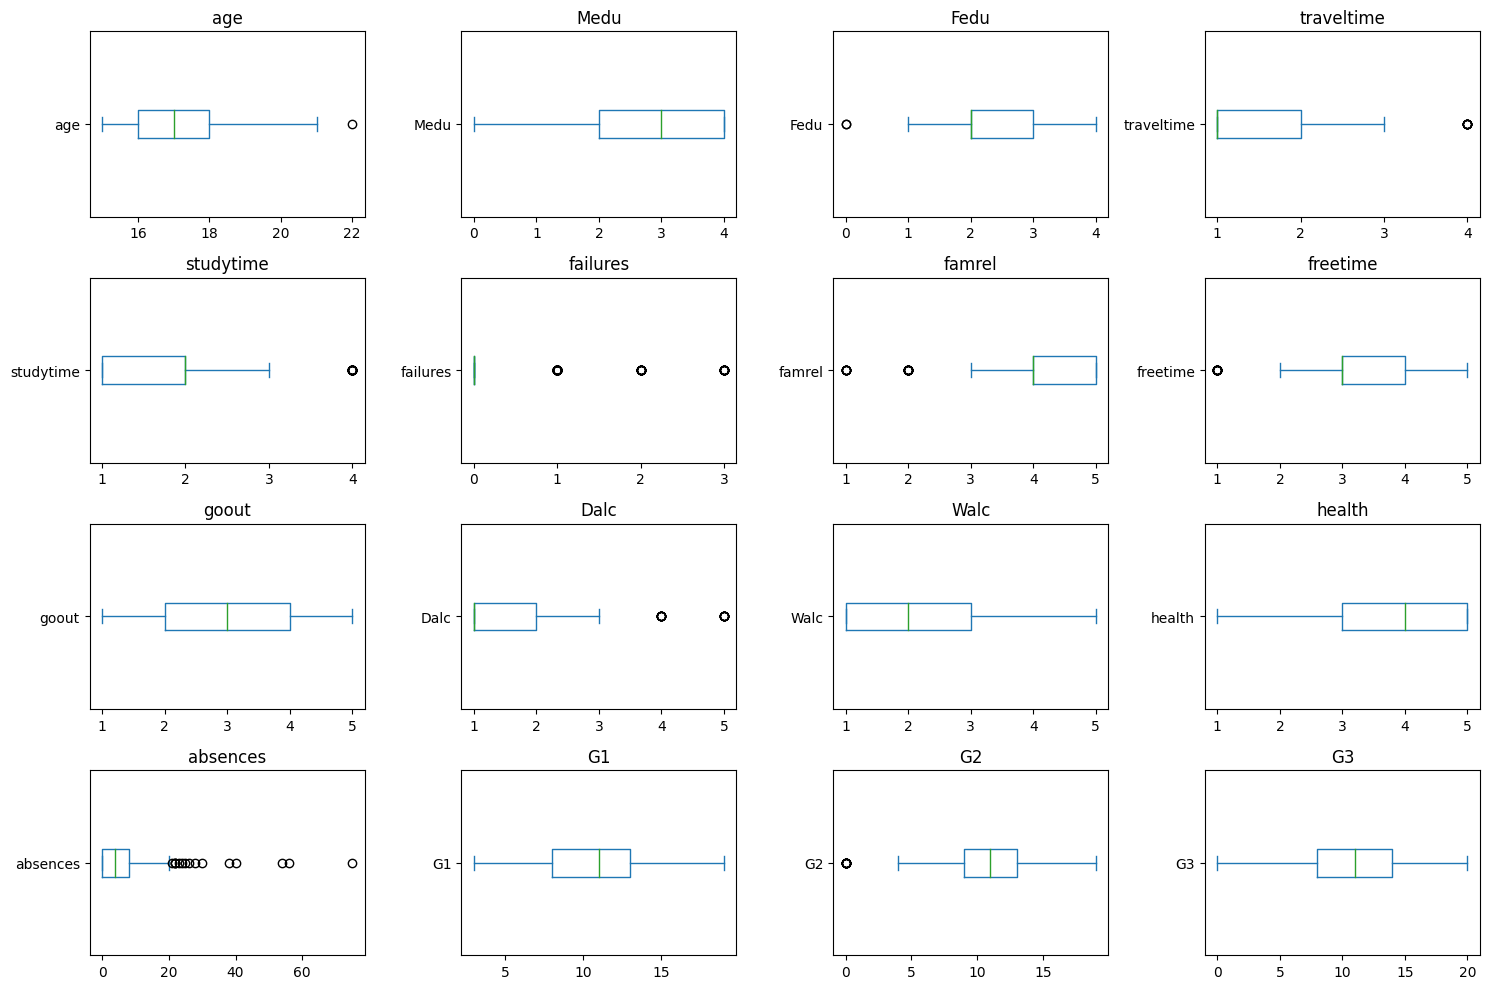

In [9]:
# Plot box plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    student_data[col].plot(kind='box', vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()


#X and y Dataset

In [10]:
# Convert categorical variables to numerical using one-hot encoding
student_data_encoded = pd.get_dummies(student_data)

# Select features with high correlation with the target variable
target_variable = 'G3'
significant_features = correlation_matrix[target_variable][(correlation_matrix[target_variable] > 0.7) | (correlation_matrix[target_variable] < -0.7)].index.tolist()
significant_features.remove('G3')

# Prepare data for modeling
X = student_data_encoded[significant_features]
y = student_data_encoded[target_variable]


In [11]:
print(significant_features)

['G1', 'G2']


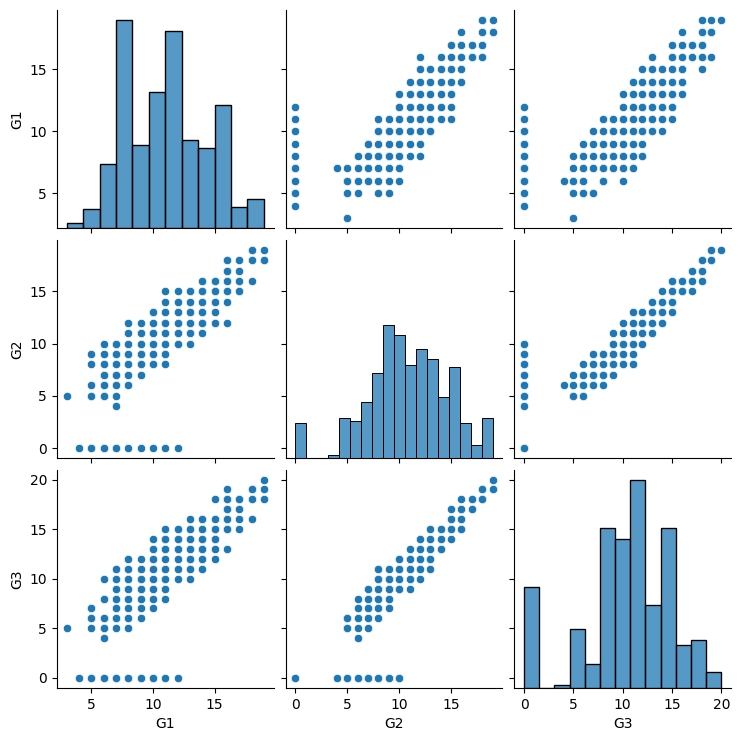

In [12]:
# Pairplot
sns.pairplot(student_data_encoded[significant_features + [target_variable]])
plt.show()


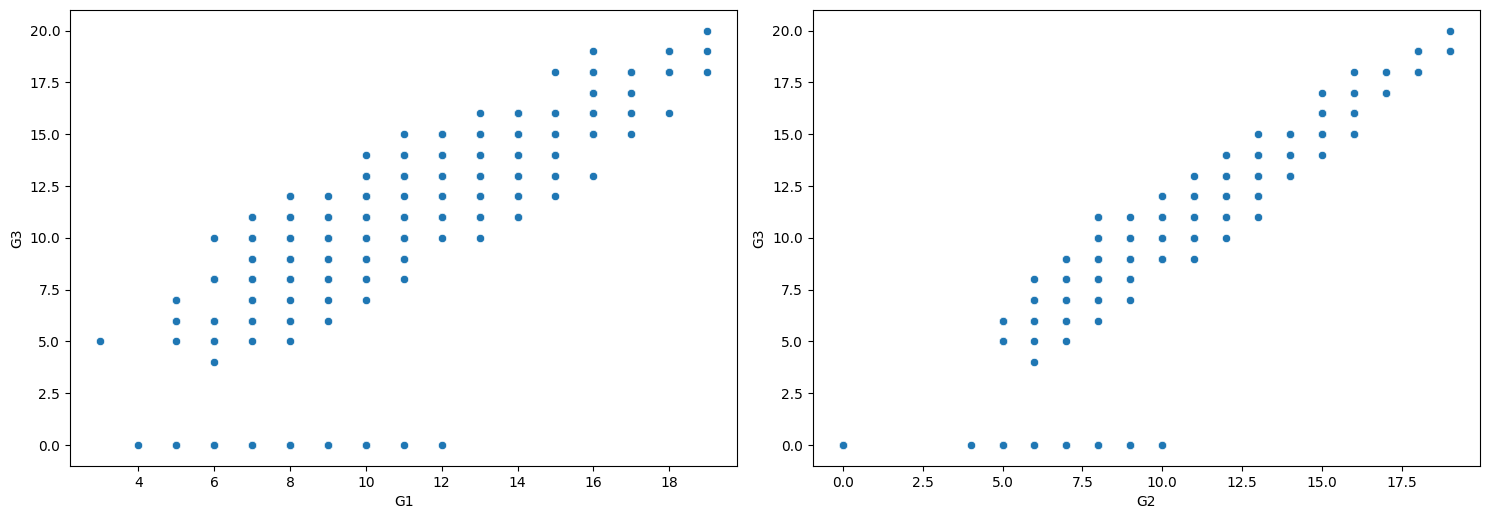

In [13]:
# Scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(significant_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=col, y=target_variable, data=student_data_encoded)
plt.tight_layout()
plt.show()


#Models & Results

###Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) score:", r2)


Mean Squared Error: 4.2118674966017595
R-squared (R2) score: 0.7945936216805897


###Ridge Regression

In [15]:
def plot_grid_search_results(grid_search):
    alphas = [param['alpha'] for param in grid_search.cv_results_['params']]
    mean_scores = grid_search.cv_results_['mean_test_score']
    mean_scores = np.array(mean_scores).reshape(len(alphas))

    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mean_scores, marker='o', linestyle='-', color='b')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Squared Error')
    plt.title('Grid Search Results')
    plt.grid(True)
    plt.show()

Best alpha value: 0.0001
Ridge Regression - Mean Squared Error: 4.2118672151177785
Ridge Regression - R-squared (R2) score: 0.7945936354081358


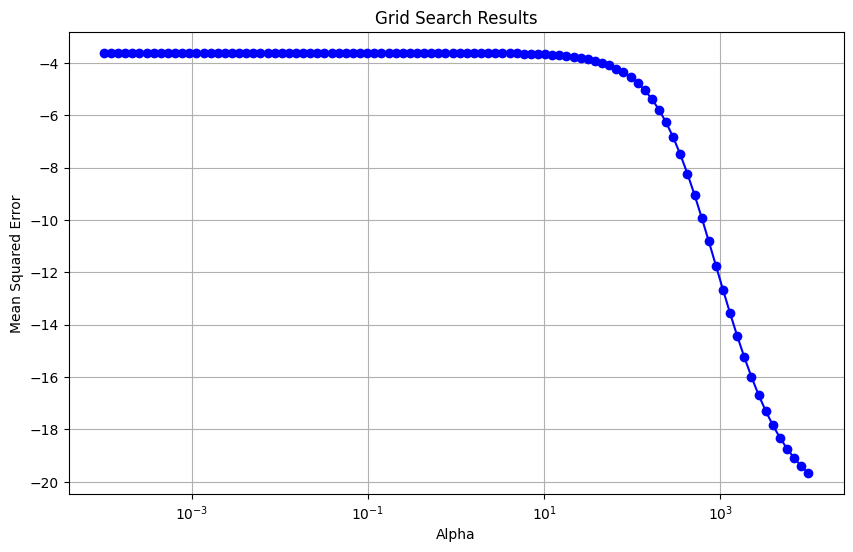

In [16]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alphas = np.logspace(-4, 4, 100)

# Create a dictionary for the grid search parameters
param_grid = {'alpha': alphas}

# Initialize the Ridge regression model
ridge_model = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value found during grid search
best_alpha = grid_search.best_params_['alpha']

print("Best alpha value:", best_alpha)

# Initialize the Ridge regression model with the best alpha value
ridge_model_best = Ridge(alpha=best_alpha)

# Train the model with the best alpha value
ridge_model_best.fit(X_train, y_train)


# Make predictions with Lasso
y_pred_ridge = ridge_model_best.predict(X_test)

# Evaluate Lasso model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared (R2) score:", r2_ridge)

plot_grid_search_results(grid_search)


###Lasso Regression

Best alpha value: 0.0001
Lasso Regression - Mean Squared Error: 4.211868546397377
Lasso Regression - R-squared (R2) score: 0.7945935704836524


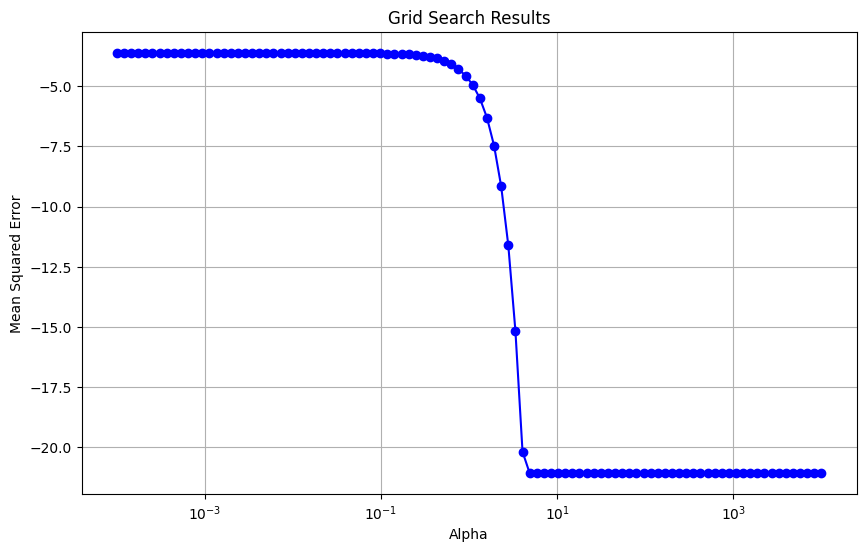

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define a range of alpha values to search
alphas = np.logspace(-4, 4, 100)

# Create a dictionary for the grid search parameters
param_grid = {'alpha': alphas}

# Initialize the Lasso regression model
lasso_model = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value found during grid search
best_alpha = grid_search.best_params_['alpha']

print("Best alpha value:", best_alpha)

# Initialize the Lasso regression model with the best alpha value
lasso_model_best = Lasso(alpha=best_alpha)

# Train the model with the best alpha value
lasso_model_best.fit(X_train, y_train)

# Make predictions with Lasso
y_pred_lasso = lasso_model_best.predict(X_test)

# Evaluate Lasso model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R-squared (R2) score:", r2_lasso)
plot_grid_search_results(grid_search)





###ElasticNet Regression

In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are already defined (X as feature data, y as target data)

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Elastic Net Regression
# You can adjust alpha and l1_ratio to control the strength and type of regularization
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.9)  # Adjust parameters as needed
elastic_net_model.fit(X_train, y_train)

# Make predictions with Elastic Net
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluate Elastic Net model performance
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print("Elastic Net Regression - Mean Squared Error:", mse_elastic_net)
print("Elastic Net Regression - R-squared (R2) score:", r2_elastic_net)


Elastic Net Regression - Mean Squared Error: 4.205885721377215
Elastic Net Regression - R-squared (R2) score: 0.7948853437696122
